In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
dataset = pd.read_csv("50_Startups.csv")
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# EDA

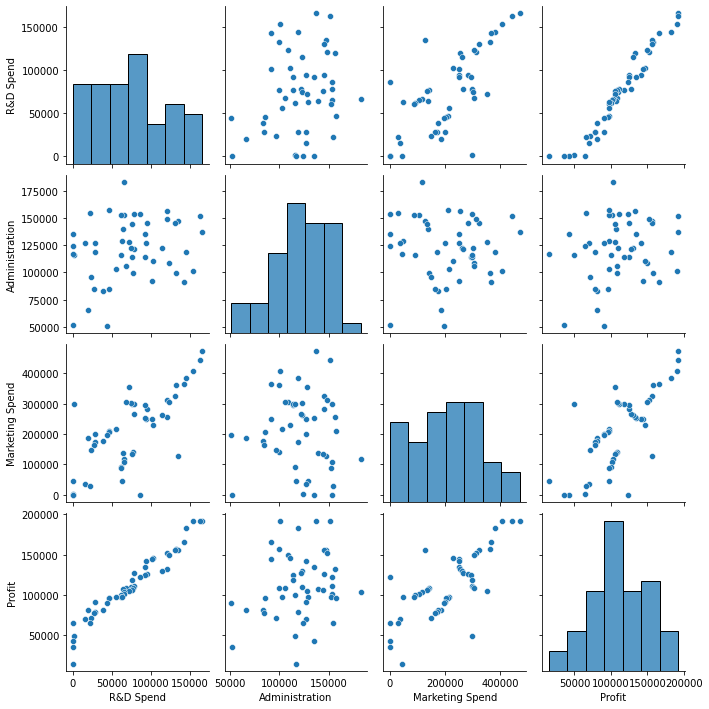

In [5]:
sns.pairplot(dataset)

<AxesSubplot:>

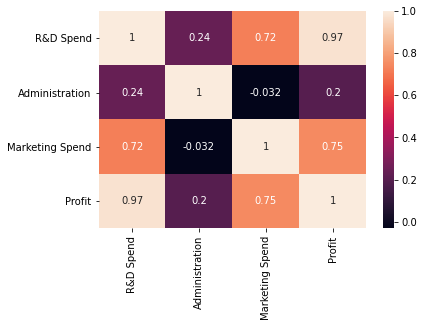

In [6]:
sns.heatmap(dataset.corr(),annot=True)

# Train Test Split

In [7]:
X = dataset[["R&D Spend", "Administration", "Marketing Spend", "State"]]
y = dataset["Profit"]
X,y

(    R&D Spend  Administration  Marketing Spend       State
 0   165349.20       136897.80        471784.10    New York
 1   162597.70       151377.59        443898.53  California
 2   153441.51       101145.55        407934.54     Florida
 3   144372.41       118671.85        383199.62    New York
 4   142107.34        91391.77        366168.42     Florida
 5   131876.90        99814.71        362861.36    New York
 6   134615.46       147198.87        127716.82  California
 7   130298.13       145530.06        323876.68     Florida
 8   120542.52       148718.95        311613.29    New York
 9   123334.88       108679.17        304981.62  California
 10  101913.08       110594.11        229160.95     Florida
 11  100671.96        91790.61        249744.55  California
 12   93863.75       127320.38        249839.44     Florida
 13   91992.39       135495.07        252664.93  California
 14  119943.24       156547.42        256512.92     Florida
 15  114523.61       122616.84        26

## Our feature column contains categorical data, we must do encoding before using it.
## Need to do before train test split

In [8]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

In [9]:
labelencoder_X = LabelEncoder()
X

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida
5,131876.90,99814.71,362861.36,New York
6,134615.46,147198.87,127716.82,California
7,130298.13,145530.06,323876.68,Florida
8,120542.52,148718.95,311613.29,New York
9,123334.88,108679.17,304981.62,California


In [10]:
X["State"] = labelencoder_X.fit_transform(X["State"])
X

<ipython-input-10-6bd7a94601d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["State"] = labelencoder_X.fit_transform(X["State"])


,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1
5,131876.90,99814.71,362861.36,2
6,134615.46,147198.87,127716.82,0
7,130298.13,145530.06,323876.68,1
8,120542.52,148718.95,311613.29,2
9,123334.88,108679.17,304981.62,0


In [11]:
onehotencoder = OneHotEncoder()
ct = ColumnTransformer(transformers=[('encode',onehotencoder,[3])],remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [12]:
X= pd.DataFrame(X)
X.head()

,0,1,2,3,4,5
0,0.0,0.0,1.0,165349.20,136897.80,471784.10
1,1.0,0.0,0.0,162597.70,151377.59,443898.53
2,0.0,1.0,0.0,153441.51,101145.55,407934.54
3,0.0,0.0,1.0,144372.41,118671.85,383199.62
4,0.0,1.0,0.0,142107.34,91391.77,366168.42


In [13]:
# categories = X['State']
# onehotencoder = OneHotEncoder(categories=categories)
# X = onehotencoder.fit_transform(X).toarray()


In [14]:
# Avoiding the dummy variable trap
#X = X.iloc[:,1:]
X = X[[1,2,3,4,5]]

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [16]:
X_train

,1,2,3,4,5
3,0.0,1.0,144372.41,118671.85,383199.62
41,1.0,0.0,27892.92,84710.77,164470.71
30,1.0,0.0,61994.48,115641.28,91131.24
15,0.0,1.0,114523.61,122616.84,261776.23
20,0.0,0.0,76253.86,113867.30,298664.47
43,0.0,1.0,15505.73,127382.30,35534.17
38,0.0,1.0,20229.59,65947.93,185265.10
44,0.0,0.0,22177.74,154806.14,28334.72
39,0.0,0.0,38558.51,82982.09,174999.30
10,1.0,0.0,101913.08,110594.11,229160.95


In [17]:
X_test

,1,2,3,4,5
37,0.0,0.0,44069.95,51283.14,197029.42
14,1.0,0.0,119943.24,156547.42,256512.92
21,0.0,1.0,78389.47,153773.43,299737.29
32,0.0,0.0,63408.86,129219.61,46085.25
22,1.0,0.0,73994.56,122782.75,303319.26
1,0.0,0.0,162597.70,151377.59,443898.53
26,1.0,0.0,75328.87,144135.98,134050.07
46,1.0,0.0,1315.46,115816.21,297114.46
42,0.0,0.0,23640.93,96189.63,148001.11
47,0.0,0.0,0.00,135426.92,0.00


In [18]:
y_train

3     182901.99
41     77798.83
30     99937.59
15    129917.04
20    118474.03
43     69758.98
38     81229.06
44     65200.33
39     81005.76
10    146121.95
49     14681.40
25    107404.34
33     96778.92
36     90708.19
2     191050.39
27    105008.31
34     96712.80
35     96479.51
8     152211.77
19    122776.86
29    101004.64
12    141585.52
5     156991.12
0     192261.83
28    103282.38
4     166187.94
40     78239.91
13    134307.35
9     149759.96
48     35673.41
23    108733.99
6     156122.51
17    125370.37
11    144259.40
31     97483.56
Name: Profit, dtype: float64

In [19]:
y_test

37     89949.14
14    132602.65
21    111313.02
32     97427.84
22    110352.25
1     191792.06
26    105733.54
46     49490.75
42     71498.49
47     42559.73
16    126992.93
24    108552.04
7     155752.60
45     64926.08
18    124266.90
Name: Profit, dtype: float64

# Fitting Model

In [20]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

# Predicting Result

In [21]:
y_pred = regression.predict(X_test)

In [22]:
y_test

37     89949.14
14    132602.65
21    111313.02
32     97427.84
22    110352.25
1     191792.06
26    105733.54
46     49490.75
42     71498.49
47     42559.73
16    126992.93
24    108552.04
7     155752.60
45     64926.08
18    124266.90
Name: Profit, dtype: float64

In [23]:
y_pred

array([ 85610.28281246, 155888.39676561, 118955.25250463,  97321.71949357,
       120058.71468288, 191229.46901726, 115589.05335193,  61472.62238194,
        68398.23852831,  45017.90092831, 116555.37958012, 111205.46598461,
       166339.57762319,  45886.05016272, 133819.21111254])

Text(0, 0.5, 'Predicted Y')

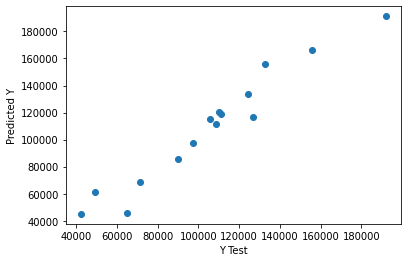

In [24]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# Evaluating the model

In [25]:
import sklearn.metrics as metrics
print('MAE: ',metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-Squared: ',metrics.r2_score(y_test, y_pred))

MAE:  8353.874382745864
MSE:  110145720.5677691
RMSE:  10495.033138002429
R-Squared:  0.9241937845117973


In [30]:
print('Train Score: ', regression.score(X_train, y_train))  
print('Test Score: ', regression.score(X_test, y_test))  

Train Score:  0.9517559349311887
Test Score:  0.9241937845117973


# Residuals

/home/ritesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


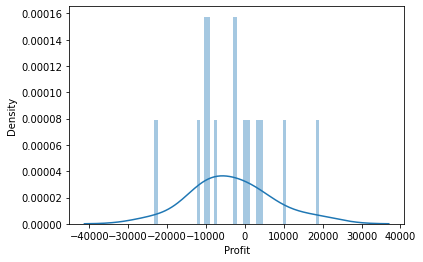

In [26]:
sns.distplot((y_test - y_pred ),bins=50);

In [27]:
coeffecients = pd.DataFrame(regression.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
1,5327.993528
2,221.046017
3,0.801206
4,0.019630
5,0.035198


# Backward Elimination

In [42]:
import statsmodels.api as sm

In [34]:
X = np.append(arr= np.ones((50,1)).astype(int), values = X , axis = 1)

In [36]:
X = pd.DataFrame(X)

In [37]:
X

,0,1,2,3,4,5
0,1.0,0.0,1.0,165349.20,136897.80,471784.10
1,1.0,0.0,0.0,162597.70,151377.59,443898.53
2,1.0,1.0,0.0,153441.51,101145.55,407934.54
3,1.0,0.0,1.0,144372.41,118671.85,383199.62
4,1.0,1.0,0.0,142107.34,91391.77,366168.42
5,1.0,0.0,1.0,131876.90,99814.71,362861.36
6,1.0,0.0,0.0,134615.46,147198.87,127716.82
7,1.0,1.0,0.0,130298.13,145530.06,323876.68
8,1.0,0.0,1.0,120542.52,148718.95,311613.29
9,1.0,0.0,0.0,123334.88,108679.17,304981.62


## Keeping SL = 0.05
## Choose the predictor which has the highest P-value, such that
## If P-value > SL, remove that predictor and fit the model again

In [45]:
import statsmodels.api as sm

In [39]:
X_opt = X.iloc[:,[0,1,2,3,4,5]]

In [43]:
regressor_OLS=sm.OLS(endog = y, exog=X_opt).fit() 

In [44]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 11 Aug 2021   Prob (F-statistic):           1.34e-27
Time:                        18:31:49   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0           5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
1            198.7888   3371.007      0.059      0.953   -6595.030    6992.607
2            -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
3              0.8060      0.046     17.369      0.000       0.712       0.900
4             -0.0270      0.052     -0.517      0.608      -0.132       0.078
5              0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
X_opt = X.iloc[:,[0,1,3,4,5]]
regressor_OLS=sm.OLS(endog = y, exog=X_opt).fit() 
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 11 Aug 2021   Prob (F-statistic):           8.49e-29
Time:                        18:54:04   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0           5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
1            220.1585   2900.536      0.076      0.940   -5621.821    6062.138
3              0.8060      0.046     17.606      0.000       0.714       0.898
4             -0.0270      0.052     -0.523      0.604      -0.131       0.077
5              0.0270      0.017      1.592      0.118      -0.007       0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
X_opt = X.iloc[:,[0,3,4,5]]
regressor_OLS=sm.OLS(endog = y, exog=X_opt).fit() 
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 11 Aug 2021   Prob (F-statistic):           4.53e-30
Time:                        18:54:27   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0           5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
3              0.8057      0.045     17.846      0.000       0.715       0.897
4             -0.0268      0.051     -0.526      0.602      -0.130       0.076
5              0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
X_opt = X.iloc[:,[0,3,5]]
regressor_OLS=sm.OLS(endog = y, exog=X_opt).fit() 
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Wed, 11 Aug 2021   Prob (F-statistic):           2.16e-31
Time:                        18:54:47   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0           4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
3              0.7966      0.041     19.266      0.000       0.713       0.880
5              0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
X_opt = X.iloc[:,[0,3]]
regressor_OLS=sm.OLS(endog = y, exog=X_opt).fit() 
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Wed, 11 Aug 2021   Prob (F-statistic):           3.50e-32
Time:                        18:55:07   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0           4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
3              0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""